# Preprocesamiento de datos

[Video](https://www.youtube.com/watch?v=OGWwzm304Xs)

Para desarrollar los algoritmos de machine learning necesitamos abastecer a nuestros modelos con datos. Estos datos tiene que estar bien estructurados y deben ser de la mejor calidad posible. Para alcanzar esta calidad antes debemos hacer un buen trabajo de preprocesamiento para **limpiar, ordenar y filtrar** los datos que vamos a darle a la máquina.

Esto es un trabajo muy importante para la ciencia de datos. Limpiar, ordenar y filtrar es la mitad del trabajo antes de pasar a manipular los datos y sacar conclusiones.
    

El proceso lógico es el siguiente:

    - CODIFICAR. Transformar valores cualitativos en valores cuantitativos.
    - NORMALIZAR. Estudiar la frecuencia de los valores cuantitativos.
    - IMPUTAR. Cambiar valores que faltan por un valor estadístico.
    - SELECCIONAR VARIABLES. Seleccionar las variables relevantes para el modelo.
    - EXTRAER. Generar una nueva información a partir de los datos.
    

Para todo este proceso Sklearn posee diferentes módulos: 

1. codificar y normalizar `sklearn.preprocesing`
2. imputar `sklearn.impute`
3. selection `sklearn.feature_selection`
4. extraction `sklearn.feature_extraction`

## Preprocessing. Preprocesado

En este documento nos vamos a centrar en el preprocesamiento de datos y nos vamos a centrar en el módulo de `sklearn.preprocesing`. El resto de módulos se explicarán en documentos ulteriores.

[Referencia API](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

[Guia de usuario](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

Si nos vamos al enlace de la referencia API veremos que aparecen ordenados dos grupos, el primero las clases de transformadores se identifican bien porque empiezan por mayúscula y luego, en minúscula, las funciones matemáticas. 
Lo que más nos interesan son las clases, porque nos brindan una interfaz de programación muy sencilla y útil.

In [1]:
# cargamos lo módulos
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
X = np.array(['gato',
              'perro',
              'gato',
              'pájaro']) #no te olvides de las comas

In [3]:
transformer = LabelEncoder() # inicializamos la codificación
transformer.fit(X) # al método .fit() le pasamos el array con los datos

LabelEncoder()

In [4]:
transformer.transform(X) # transformamos los datos en valores

array([0, 1, 0, 2], dtype=int64)

Estos dos métodos se pueden simplificar en uno solo:  `.fit_transform()`

In [5]:
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

## Encoder (codificar)

En los modelos de machine learning es necesario presentarle los datos en forma numérica. Si nuestro dataset tiene datos cualitativos es indispensable convertirlos en valores numéricos. Es decir, codificar la información.

En sklearn existen 5 codificadores:
1. `preprocessing.LabelBinarizer()`
2. `preprocessing.LabelEncoder`
3. `preprocessing.MultilabelBinarizer()`
4. `preprocessing.OneHotEncoder()`
5. `preprocessing.OrdinalEncoder()`
    
Estos coficicadores permiten realizar uno de los dos tipos de codificación:
1. Codificación Ordinal
2. Codificación One-Hot

La Codificación Ordinal consiste simplemente a asocial cada categoría de la variable a un valor decimal. 
Para esto usamos `LabelEncoder` y `OrdinalEncoder`

### LabelEncoder

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
y = np.array(['gato', 'perro', 'gato', 'pájaro']) #creamos el dataset

In [8]:
# creamos un objeto de la clase LabelEncoder()
encoder = LabelEncoder()

# usamos el método para codificar los datos
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

Los datos ya están codificados y a cada categoría se le ha asignado un valor numérico. Ahora podemos hacer el proceso inverso y preguntarle por un número para que nos diga a qué palabra corresponde.

In [9]:
encoder.inverse_transform(np.array([0, 0, 0, 2]))

array(['gato', 'gato', 'gato', 'pájaro'], dtype='<U6')

__OJO. Este proceso es muy sensible a faltas de ortografía, por lo que tenemos que vigilar ese detalle.__

In [10]:
z = np.array(['gato', 'perro', 'gato', 'pájaro', 'pajaro', 'Pájaro'])
encoder = LabelEncoder()
encoder.fit_transform(z)

array([1, 3, 1, 4, 2, 0], dtype=int64)

### OrdinalEncoder

Imaginemos tener un dataset de dos dimensiones. Por lo que hemos visto lo podríamos aplicar el LabelEncoder

In [11]:
X = np.array([['gato','pollo'],
             ['perro', 'gato'],
             ['pájaro', 'oveja'],
             ['pollo', 'perro']])

In [12]:
# esto nos devuelve un error por tratarse de un array de 2 dimensiones
# encoder.fit_transform(X)

Si leemos el error nos dice que el valor que le hemos pasado debería de ser un array de 1 dimensión, pero que en este caso su dimensión es mayor por tratarse de un array (4,2)

Para este caso necesitamos usar `OrdinalEncoder` que es el método capaz de tratar con la matriz de datos que normalmente denotamos como `X`

In [13]:
# importamos la clase que vamos a usar
from sklearn.preprocessing import OrdinalEncoder

In [14]:
# rebautizamos el objeto usando otra clase
encoder = OrdinalEncoder()

# le pasamos los datos de la matriz de valores
encoder.fit_transform(X)

array([[0., 3.],
       [1., 0.],
       [3., 1.],
       [2., 2.]])

leyendo estos valores que hemos codificado podríamos pensar que hay categorías con valores mayores que otras. Nada más lejos de la realidad, se le asigna un número por el orden de aparición y no se pueden relacionar unas categorías con otras. No se ùeden relacionar aritméticamente los datos.

Por eso usaremos los métodos ONE HOT donde encontramos los codificadores:
1. `LabelBinarizer`
2. `MultilabelBinarizer`
3. `OneHotEncoder`

En este proceso de codificación ONE HOT lo que hacemos es crear una matriz de valores binarios donde cada categoría está representada por una columna. 

### LabelBinarizer

In [15]:
from sklearn.preprocessing import LabelBinarizer

In [16]:
y = np.array(['gato', 'perro', 'gato', 'pájaro'])

In [17]:
encoder = LabelBinarizer() #creamos un objeto LabelBinarizer
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

Veamos lo que hemos obtenido. Para esta matríz se han creado 3 columnas y 4 filas, que corresponden a las 3 categorías y a los 4 valores del array.

En este caso contamos con muy pocos datos, pero si nos imaginamos realizar esta codificación con centenares de datos podemos tener matrices gigantes llenas de unos y ceros que son muy pesadas. 
En ralidad estamos creando matrices **hueca** (*sparse matrix*) y los espacios con valor 0 no ocupan espacio en memoria. 

Imaginemos un ejemplo:

In [18]:
# tenemos una matriz 5x5 con tres valores a, b y c

A = ([['a', 0, 0, 0, 0],
      [0, 0, 'b', 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0,'c'],
      [0, 0, 0, 0, 0]])

In [19]:
# podemos organizar los datos en tres vectores: 
values = ['a','b','c']
rows   = [0,1,3]
cols   = [0,2,4]

Podríamos decir que la matriz `A` 5x5 sería equivalente a la matriz 3x3 formada por los tres vectores. En `A` tenemos todos los huecos llenos de `0` y en la nueva matriz tenemos los valores y la posición que ocupan.

Esta forma de empaquetar los datos se llama **Compressed Sparse Row**, lo que en español se podría traducir como: compresión de huecos de filas. Y de hecho, `LabelBinarizer` contiene un parámetro para obtener esto mismo de lo que hablamos. `sparse_output=True`

In [20]:
encoder = LabelBinarizer(sparse_output=True) #creamos un objeto LabelBinarizer
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.preprocessing import OneHotEncoder

X = np.array([['gato','pollo'],
             ['perro', 'gato'],
             ['pájaro', 'oveja'],
             ['pollo', 'perro']])

encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

Con esto queda visto todo lo relativo a la codificación y ahora nos toca ver algo muy importante en el preprocesado: la Normalización

## Normalización

Es indispensable normalizar los datos y organizarlos bajo una misma escala. Este proceso de normalización puede ser determinante para alcanzar el éxito en nuestro modelo y es bastante útil en casos como el uso del Descenso del Gradiente.

Aquí encontramos:
1. `preprocessing.MinMaxScaler()`
2. `preprocessing.RobustScaler()`
3. `preprocessing.StandardScaler()`

Veamos cada uno de ellos

### Normalización MinMax

Consiste en transformar cada variable y asignarle un valor equivalente dentro del intervalo 0 y 1.

Lo que obtenemos es otro array con datos que no son realmente muy útiles para nosotros, pero sí para la máquina. 
Si ahora le aportamos nuevos datos, ella los va a automáticamente a transformar en base a lo que ya le hemos dado, puesto que le hemos dado el invervalo entre 70-120 y ella lo ha transformado en un intervalo 0-1.

In [8]:
# importamos la clase
from sklearn.preprocessing import MinMaxScaler

# imaginemos un vector de superficies de 3 pisos
X = np.array([[70],
              [80],
              [120]])

# creamos el objeto de la clase MinMaxScaler
scaler = MinMaxScaler()

# le pasamos los datos de X
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [23]:
# usamos un dato de validación y lo transofmamos
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

### Standard Scaler. Escalado estadar

La normalización estandar toma como intervalo los valores en -1 y 1, siendo la media de este intervalo el valor 0.
Veamos como el proceso es idéntico al ya visto, pero los datos que nos devuelve son diferentes.

In [10]:
# importamos la clase
from sklearn.preprocessing import StandardScaler

# imaginemos un vector de superficies de 3 pisos
X = np.array([[70],
              [80],
              [120]])

# creamos el objeto de la clase StandardScaler
scaler = StandardScaler()

# le pasamos los datos de X
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

### ¡OJO!
porque estos procesos son sensibles a los valores aberrantes, es decir, valores muy alejados de los que tenemos en el dataset. Veámoslo con el ejemplo de los datos de la flor de iris.

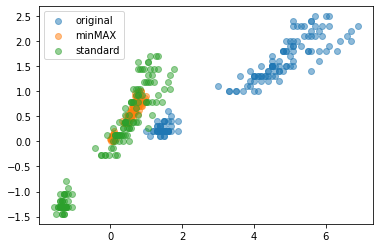

In [11]:
# importamos el dataset
from sklearn.datasets import load_iris

# creamos el objeto iris y le pasamos los datos a la variable X
iris = load_iris()
X = iris.data

# usamos las dos normalizaciones
X_minMAX = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

# representamos los datos originales
plt.scatter(X[:,2], X[:,3], alpha=0.5, label='original')

# representamos las normalizaciones
plt.scatter(X_minMAX[:,2], X_minMAX[:,3], alpha=0.5, label='minMAX')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], alpha=0.5, label='standard')

plt.legend()
plt.show()


Ahora vamos a implementar un pequeño cambio y vamos a introducir valores aberrantes a la muestra

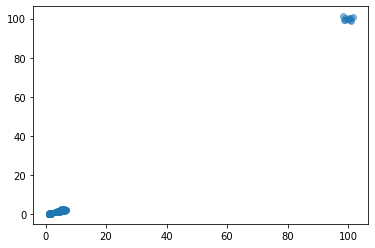

In [28]:
# introducimos 10 valores aberrantes entorno a la cota 100
outliers = np.full((10,4), 100) + np.random.randn(10,4)

# los unimos a los datos que ya teníamos de X
X = np.vstack((X, outliers))

plt.scatter(X[:,2], X[:,3], alpha=0.5, label='original')
plt.show()

Ahora los valores aparecen comprimidos en la esquina inferior izquierda de la pantalla por culpa de los valores aberrantes

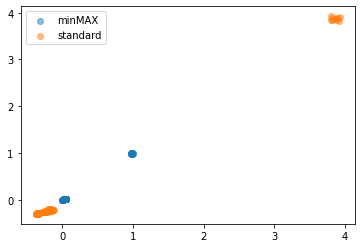

In [29]:
X_minMAX = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

# representamos las normalizaciones
plt.scatter(X_minMAX[:,2], X_minMAX[:,3], alpha=0.5, label='minMAX')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], alpha=0.5, label='standard')

plt.legend()
plt.show()

De igual manera, estos valores aberrantes afectan a los métodos de normalización que hemos visto, de hecho en el caso de minMax pareciera que tuviérmos 3 puntos. 
La conclusión es que estos métodos, aunque útiles, son poco eficaces si nuestros valores cuentan con datos que distorsionan mucho las tendencias. 

A pesar de todo conocemos un método para que estos valores aberrantes nos afecten lo menos posible. 

### Robust Scaler
En este caso hacemos uso de un concepto de la estadística conocido pero poco utilizado: la mediana. La mediana representa el valor de la variable de posición central en un conjunto de datos ordenados. 

En este caso `RobustScaler()` lo que hace es normalizar los datos tomando la mediana y el intervalo entre el primer cuartil Q1(25%) y el tercer cuartil Q3(75%)

In [34]:
# importamos la clase
from sklearn.preprocessing import RobustScaler
%matplotlib

# introducimos 10 valores aberrantes entorno a la cota 100
outliers = np.full((10,4), 100) + np.random.randn(10,4)

# los unimos a los datos que ya teníamos de X
X = np.vstack((X, outliers))

X_robust = RobustScaler().fit_transform(X)
X_minMAX = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3], alpha=0.5, label='original')
plt.scatter(X_minMAX[:,2], X_minMAX[:,3], alpha=0.5, label='MinMaxScaler')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], alpha=0.5, label='StandardScaler')
plt.scatter(X_robust[:,2], X_robust[:,3], alpha=0.5, label='RobustScaler')

plt.legend()
plt.show()

Using matplotlib backend: Qt5Agg


## Polinomial Features. Caracterización polinomial
Es muy útil para crear variables polinomiales, también llamado Featuring Engineering ysado para crear modelos de ML muy ricos y sofisticados.
en esencia este método convierte nuestra variable de entrada en el resultado de un polinomio de grado n y el método se encarga de buscar los factores que acompañan a la variable x^n y el término independiente. 


In [2]:
#importamos la clase  
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[1],
             [2],
             [0.5]])
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

Esto nos viene muy bien para ajustar el modelo a una nube de putnso que sea muy compleja. Veámoslo con un ejemplo

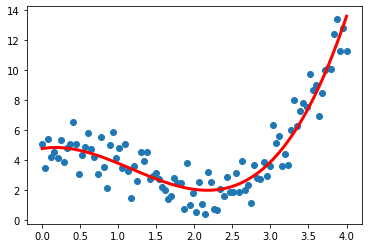

In [5]:
from sklearn.linear_model import LinearRegression

X = np.linspace(0,4,100).reshape((100,1))
y = X**2 + 5*np.cos(X)+ np.random.randn(100,1)

plt.scatter(X,y)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, c='r', lw=3)
plt.show()

## Clase Pipeline

Como ya sabemos cuando desarrollamos un modelo de ML tomamos unos datos de entrenamiento y unos datos de ensayo. 

Con los datos de entrenamiento creamos un Transformador mediante `fit_transform()` que trata los datos y nos ayuda a entrenar un Estimador `fit()`. Cuando tomamos los datos de ensayo usamos ese Transformador `transform()` para tratar los datos de ensayo y se lo pasamos a nuestro Estimador para hacer la predicción `predict()`

Si traducimos esto en código

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [12]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
# Transformador
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimador
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

# Datos de test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2])

Existe una forma mucho más simple y elegante de escribir todo este código. El truco está en crear una herramienta que realiza a la vez la transformació y la estimación de una sola vez: un Pipeline. 

Este Pipeline no es más que una cadena de transformación, es un estimador compuesto. 
Esto se traduce en que todo el código que hemos visto se reduce a una sola línea. Veámoslo

In [18]:
# importamos la clase
from sklearn.pipeline import make_pipeline

# creamos el modelo
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2])

Obtenemos exáctamente el mismo código y conseguimos minimizar errores.

### Pipeline GridSearchCV

Mediante  `GridSearchCV` podemos encontrar los mejores parámetros de la pipeline. Todo lo que hay que hacer es definir el pipeline y crear un diccionario de parámetros para mejorar el rendimiento

In [24]:
# importamos la clase
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))


# creamos un diccionario de parámetros en función del modelo
params = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [26]:
# 
grid.best_params_

{'polynomialfeatures__degree': 3, 'sgdclassifier__penalty': 'l1'}

In [27]:
grid.score(X_test,y_test)

1.0